In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import math

In [8]:
seg = sitk.ReadImage(r'Z:\grodriguez\CardiacOCT\data\nnUNet_raw_data\Task502_CardiacOCT\labelsTr\NLDAMPH0012_007.nii.gz')
seg_pixel_data = sitk.GetArrayFromImage(seg)

In [12]:
unique, counts = np.unique(seg_pixel_data[160,:,:], return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0 219183]
 [     1 190968]
 [     2  26897]
 [     3  30171]
 [     6  21662]
 [     7   6735]]


In [31]:
seg_pixel_data.shape

(270, 704, 704)

In [4]:
img = np.load(r'Z:\grodriguez\CardiacOCT\data\nnUNet_preprocessed\Task502_CardiacOCT\nnUNetData_plans_v2.1_stage1\ESTNEMC0027RCA_001.npz')
img_pixel_data = img['data']
pkl_img = np.load(r'Z:\grodriguez\CardiacOCT\data\nnUNet_preprocessed\Task502_CardiacOCT\nnUNetData_plans_v2.1_stage0\ESTNEMC0027RCA_001.pkl', allow_pickle=True)

In [2]:
dataset_props = np.load(r'Z:\grodriguez\CardiacOCT\data\nnUNet_preprocessed\Task502_CardiacOCT\nnUNetPlansv2.1_plans_3D.pkl', allow_pickle=True)

In [4]:
dataset_props['original_sizes']

[(269, 679, 679),
 (270, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (269, 679, 679),
 (374, 679, 679),
 (540, 679, 679),
 (375, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (374, 679, 679),
 (539, 679, 679),
 (374, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (374, 679, 679),
 (540, 679, 679),
 (538, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (373, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (375, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (540, 679, 679),
 (539, 667, 667),
 (540, 673, 673),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (539, 679, 679),
 (540, 679, 679),
 (539, 679, 679),
 (539, 673, 673),
 (539, 679, 679),
 (539, 679

In [8]:
pkl_img.keys()

odict_keys(['original_size_of_raw_data', 'original_spacing', 'list_of_data_files', 'seg_file', 'itk_origin', 'itk_spacing', 'itk_direction', 'crop_bbox', 'classes', 'size_after_cropping', 'use_nonzero_mask_for_norm', 'size_after_resampling', 'spacing_after_resampling', 'class_locations'])

In [47]:
for channel in range(3):
    for frame in range(len(img_pixel_data)):
        if np.any(np.isnan(img_pixel_data[channel,frame,:,:]).flatten()):
            print('Nan found')
        else:
            continue
    

0
1
2


(4, 269, 689, 689) (269, 704, 704)


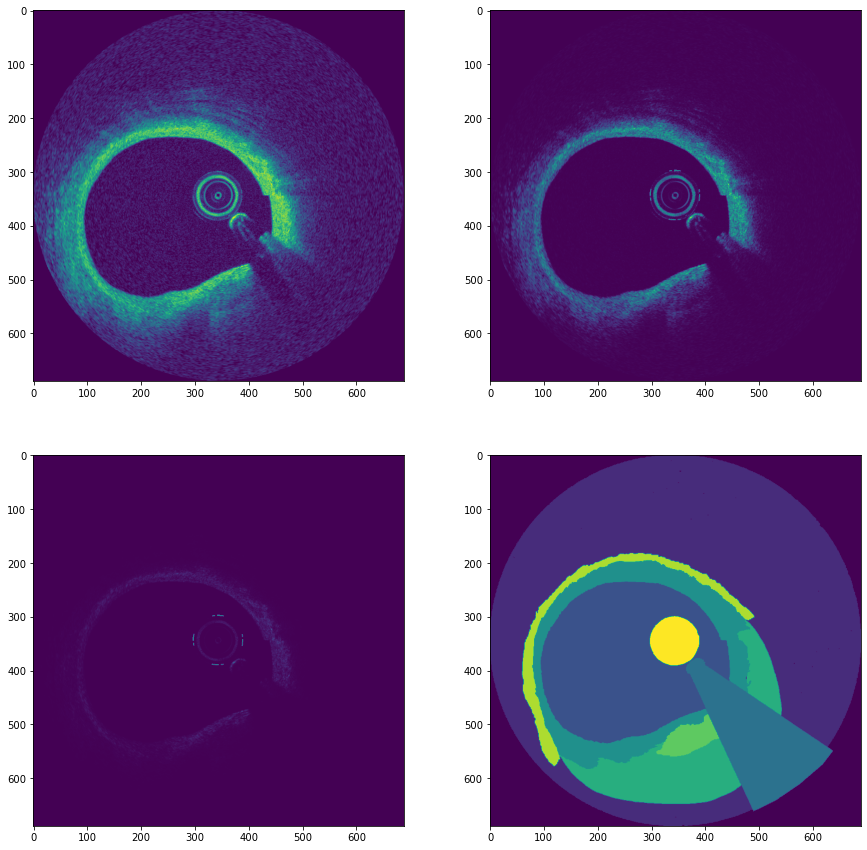

In [52]:
print(img_pixel_data.shape, seg_pixel_data.shape)

frame = 268

fig, axes = plt.subplots(2,2, figsize=(15,15))
axes = axes.flatten()
axes[0].imshow(img_pixel_data[0,frame,:,:])
axes[1].imshow(img_pixel_data[1,frame,:,:])
axes[2].imshow(img_pixel_data[2,frame,:,:])
axes[3].imshow(img_pixel_data[3,frame,:,:])

In [42]:
for key in seg.GetMetaDataKeys():
    if seg.GetMetaData(key) != img.GetMetaData(key):
        print(key)
        print('Img:', img.GetMetaData(key))
        print('Seg:', seg.GetMetaData(key))

bitpix
Img: 64
Seg: 32
datatype
Img: 64
Seg: 8


In [32]:
for frame in range(len(img_pixel_data)):

    for i in seg_pixel_data[frame,:,:].flatten():
        if isinstance(i, np.int32):
            continue
        else:
            print('Encountered different type')

In [58]:
print(list(dataset_props)[14])
print(dataset_props[list(dataset_props)[14]])

min_region_size_per_class
None


In [5]:
pkl_2d_image = np.load(r'Z:\grodriguez\CardiacOCT\data-2d\nnUNet_preprocessed\Task501_CardiacOCT\nnUNetData_plans_v2.1_2D_stage0\ESTNEMC0027_1_frame27_001.npz')
pkl_2d_image_data = pkl_2d_image['data']

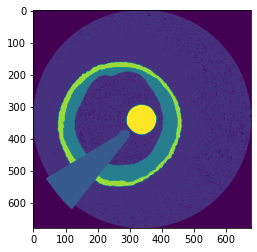

In [9]:
plt.imshow(pkl_2d_image_data[3,0,:,:])